<a href="https://colab.research.google.com/github/skintl/neural-network-churn-modelling/blob/main/neural_network_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Our Business problem which we have chosen for this tutorial is a classification problem wherein we have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
print (df.head())
df.isna().sum()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data contains no NAN values it appears to be already cleaned, we have 13 columns representing different traits about the customer base :

-CustomerID : Represents the customer's ID, safe to drop i believe

-Surname : Last name of the customer , also probably safe to drop but we'll consider adding it and see if it increases model's accuarcy later

-CreditScore : Perhaps the most important feature as to whether or not our customer will continue to be a customer or leave the bank

-Geography : another important feature that might reflect socio-economic factors influencing our customer's decision to leave or stay

-Gender : yet another important feature that might reflect social and monetary status influencing our customer's decision to leave or stay

-Age : age should also be relevant to the target column

-Tenure : Time of Bond with the company

-Balance : Amount of Money left in the account

-NumOfProducts : Number of products owned by customers

-HasCrCard : whether or not our customer owns a credit card

-IsActiveMember : whether or not our customer is an active member

-EstimatedSalary : Estimated salary of our customer

-Exited : Our Target for this Notebook  

# I- Data Transformation
Let's start by transorming our data, turning our categorical variables into numerical ones and dropping columns that may be irrelevant to our model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Dropping Surname and CustomerID
df.drop ('CustomerId',axis=1, inplace=True)
df.drop ('Surname',axis=1, inplace=True)
df.drop ('RowNumber',axis=1, inplace=True)

#Turning Geography into numerical from categorical, we will use a unique integer for each country
#Our countries are : Germany ="3" , France = "2" and = Spain "1", based on the countries' economic ranking in early 2000s
df['Geography'] = df['Geography'].replace({'Spain': 1, 'France': 2, 'Germany': 3})
#Turning Gender column into numerical from catagorical we will use 0=male 1=female
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
#Scaling down the Balance, credit score,Tenure and Salary columns using min-max feature scaling
scaler = MinMaxScaler()
df[['Balance','CreditScore','Tenure','EstimatedSalary']] = scaler.fit_transform(df[['Balance','CreditScore','Tenure', 'EstimatedSalary']])
print (df.head())
df2 = df.copy()

   CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0        0.538          2       1   42     0.2  0.000000              1   
1        0.516          1       1   41     0.1  0.334031              1   
2        0.304          2       1   42     0.8  0.636357              3   
3        0.698          2       1   39     0.1  0.000000              2   
4        1.000          1       1   43     0.2  0.500246              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1         0.506735       1  
1          0               1         0.562709       0  
2          1               0         0.569654       1  
3          0               0         0.469120       0  
4          1               1         0.395400       0  


<ipython-input-3-808445f5b6f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

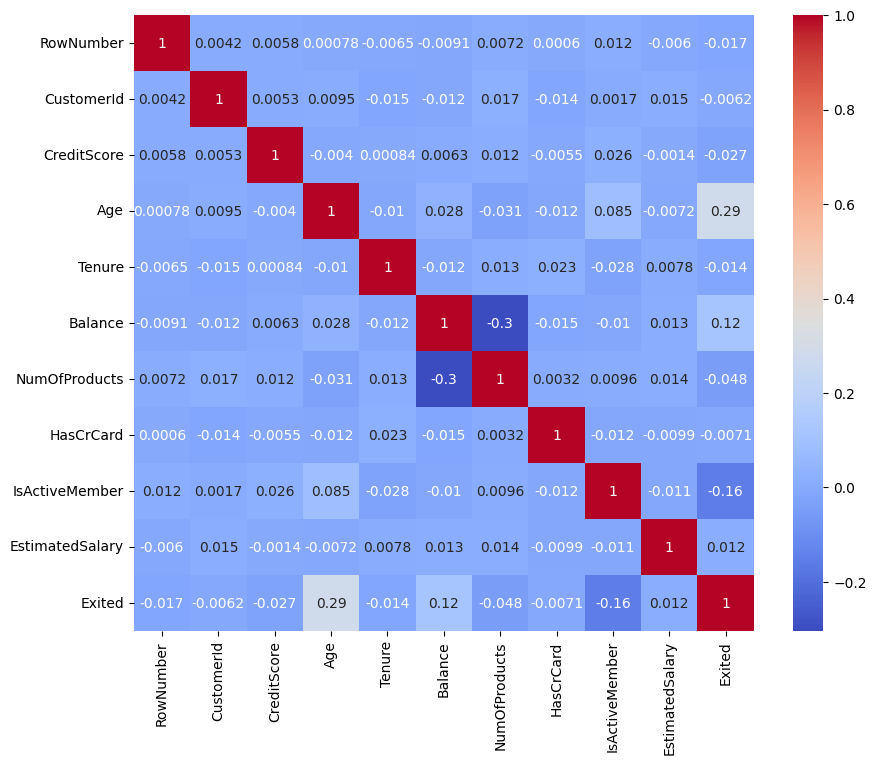

In [3]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True)

The correlation amtrix shwos that most of our columns are uncorrelated except for balance and geography which shouldn't affect the model's accuarcy that much. we can also see that our age column is very correlated with exited which makes it a very good feature.

# II-Building the ANN model and training it

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
#Splitting the data
   # Define X and y
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Defining the ANN model
ann = Sequential()
ann.add(Dense(units = X_train.shape[0] , activation = 'relu' , input_dim = 10))
ann.add(Dropout(0.5))
ann.add(Dense(512 , activation = 'relu'))
ann.add(Dropout(0.4))
ann.add(Dense(128 ,activation = 'relu'))
ann.add(Dropout(0.3))
ann.add(Dense(1 ,activation = 'sigmoid'))
#Compiling the model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


This code creates a new Sequential model that we can add layers to.
then adds a new Dense layer with 512 units and a ReLU activation function.
then adds another Dense layer with 128 units and a ReLU activation function.
adds a dropout layer with a rate of 0.5,0.4,0.3. Dropout is a regularization technique that randomly drops out some neurons during training to prevent overfitting.
then compiles the model and sets the optimizer, loss function, and metrics to be used during training. The optimizer used is 'adam', which is a popular optimizer for stochastic gradient descent. The loss function used is 'binary_crossentropy', which is appropriate for binary classification problems. The metric used is 'accuracy'.

The resulting ann model can then be trained on a training set using ann.fit(), and used to make predictions on new data using ann.predict().

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#Training the model
model_history = ann.fit(X_train, y_train, batch_size = 128 , epochs = 100)
# Evaluate the model on the test set
test_loss, test_accuracy = ann.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 6s 69ms/step - loss: 0.6705 - accuracy: 0.7649
Epoch 2/100
63/63 [==============================] - 4s 69ms/step - loss: 0.5547 - accuracy: 0.7941
Epoch 3/100
63/63 [==============================] - 4s 67ms/step - loss: 0.5115 - accuracy: 0.7944
Epoch 4/100
63/63 [==============================] - 4s 67ms/step - loss: 0.4933 - accuracy: 0.7935
Epoch 5/100
63/63 [==============================] - 4s 67ms/step - loss: 0.4796 - accuracy: 0.7983
Epoch 6/100
63/63 [==============================] - 4s 66ms/step - loss: 0.4785 - accuracy: 0.7989
Epoch 7/100
63/63 [==============================] - 4s 69ms/step - loss: 0.4687 - accuracy: 0.8034
Epoch 8/100
63/63 [==============================] - 4s 65ms/step - loss: 0.4674 - accuracy: 0.8021
Epoch 9/100
63/63 [==============================] - 4s 65ms/step - loss: 0.4607 - accuracy: 0.8060
Epoch 10/100
63/63 [==============================] - 4s 66ms/step - loss: 0.4601 - accuracy: 0.8048

In [ ]:
model_history.history.keys()


dict_keys(['loss', 'accuracy'])

# III Evaluating our model

Let's see the evolution of accuarcy during our model's training

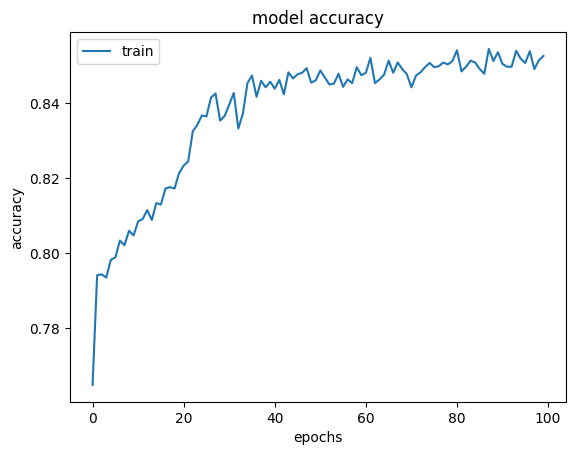

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

Now we'll observe the evolution of our model's Loss during its training

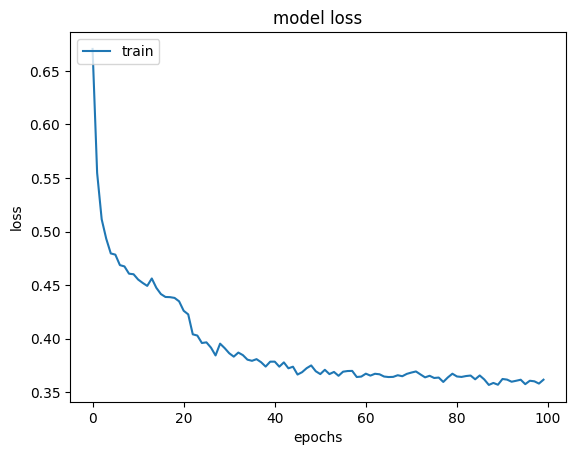

In [ ]:
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

Now our confusion matrix and a roc curve

63/63 [==============================] - 1s 7ms/step


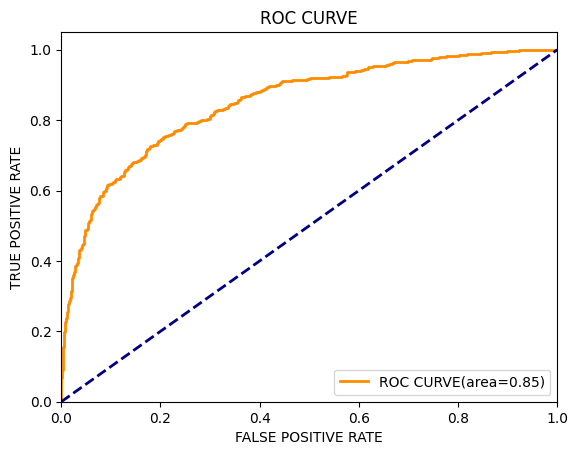

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier
predictions = ann.predict(X_test)
#y_pred_prob = mlp.predict_proba(X_test)[:, 1]
y_pred_prob =  predictions[:, 0]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'ROC CURVE(area=%0.2f)' %auc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVE')
plt.legend(loc = 'lower right')
plt.show()

mlp.predict_proba(X_test) returns an array of shape (n_samples, n_classes) containing the predicted probabilities for each sample in X_test. Since we are only interested in the predicted probability for the positive class, we use the indexing notation [:, 1] to extract the second column of the predicted probabilities array, which corresponds to the probability of belonging to the positive class.

Therefore, y_pred_prob is a 1D array of shape (n_samples,) containing the predicted probabilities of belonging to the positive class for each sample in X_te

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.82      0.29      0.43       393

    accuracy                           0.85      2000
   macro avg       0.84      0.64      0.67      2000
weighted avg       0.84      0.85      0.82      2000



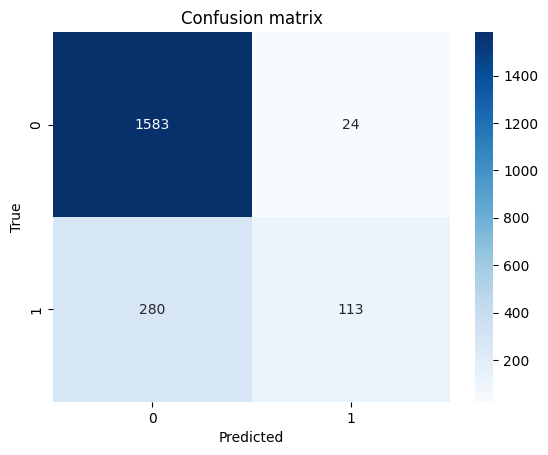

In [ ]:
from sklearn.metrics import classification_report
binary_predictions = (predictions > 0.5).astype(int)
print(classification_report(y_test,binary_predictions))
cm = confusion_matrix(y_test,binary_predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()


The confusion matrix and the report show that our model is very good at predicting that customers haven't left but is very bad at predicting the number of customers that have actually left
# III - Model Tuning :
I'm not satisfied with this result , despite having overall great global accuarcy i think we can improve the precision when it comes to predicting positive cases since that's the objective. after researching i found out that one such method is to alter the threshhold value from 0.5 to lower value, this will make us lose some accuarcy on detecting the negatives but it will help us gain more  true positives which is the objective of the tutorial.


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



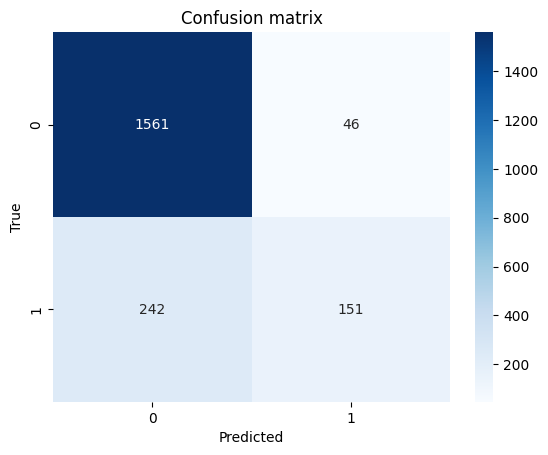

In [ ]:
#Chaning the threshhold and checking our confusion matrix with the goal of improving true positives ratio to false positives
#Threshhold : 0.4
binary_predictions = (predictions > 0.4).astype(int)
print(classification_report(y_test,binary_predictions))
cm = confusion_matrix(y_test,binary_predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()


Reducing the threshhold improved the accuarcy of true positives a bit but we need our model to be much better So let's keep testing until we find the optimal threshhold.

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1607
           1       0.50      0.71      0.59       393

    accuracy                           0.81      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.81      0.82      2000



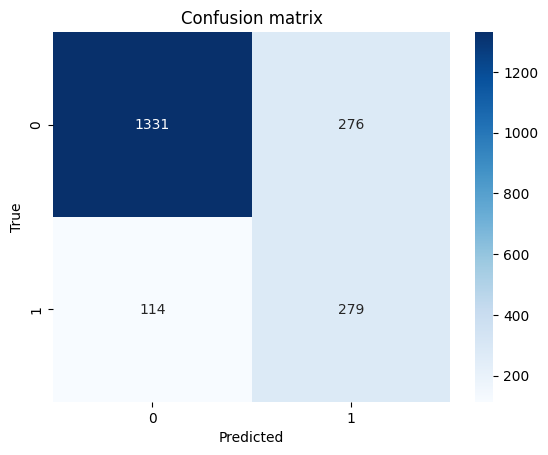

In [ ]:
#Chaning the threshhold and checking our confusion matrix with the goal of improving true positives ratio to false positives
#Threshhold : 0.2
binary_predictions = (predictions > 0.2).astype(int)
print(classification_report(y_test,binary_predictions))
cm = confusion_matrix(y_test,binary_predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



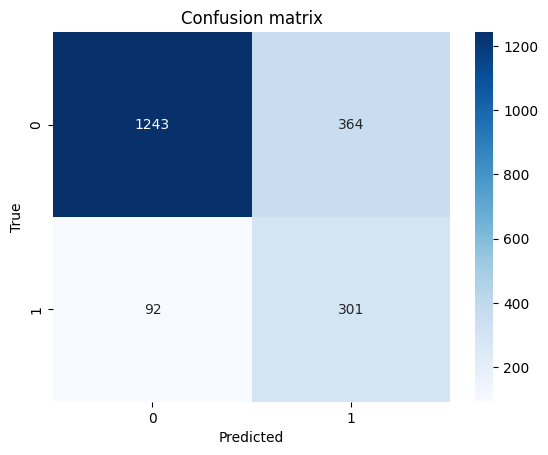

In [ ]:
#Chaning the threshhold and checking our confusion matrix with the goal of improving true positives ratio to false positives
#Threshhold : 0.18
binary_predictions = (predictions > 0.18).astype(int)
print(classification_report(y_test,binary_predictions))
cm = confusion_matrix(y_test,binary_predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1607
           1       0.30      0.92      0.46       393

    accuracy                           0.57      2000
   macro avg       0.63      0.70      0.55      2000
weighted avg       0.83      0.57      0.61      2000



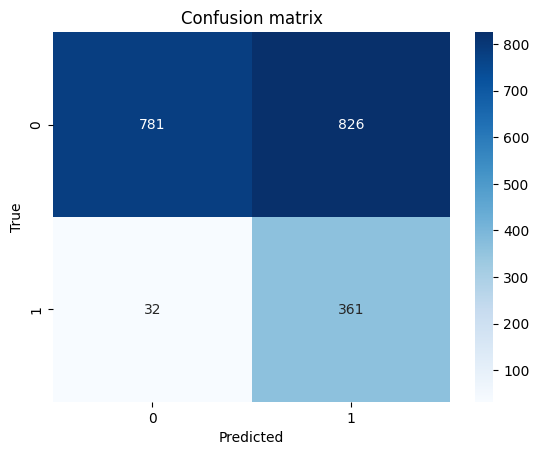

In [ ]:
#Chaning the threshhold and checking our confusion matrix with the goal of improving true positives ratio to false positives
#Threshhold : 0.1
binary_predictions = (predictions > 0.1).astype(int)
print(classification_report(y_test,binary_predictions))
cm = confusion_matrix(y_test,binary_predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

As the previous confusion matrixes demonstrate, lowering the threshhold gives us better predictions for the '1' class at the cost of losing accuarcy in the 0 class. Choosing the best threshhold surely would depend on the goal of our task. In this exercice we want to predict whether or not customers will leave the bank so increasing the accuarcy of our model in predicting the '1' class at the cost of accuarcy of the '0' class is a good thing to do.
We can choose a threshhold as low as 0.1 for maximum rate of true positives vs false negatives
or we could pick a threshhold of 0.2 for a more balanced global accuarcy